## Exercise 2. Build a bridge

In [9]:
Auther = 'Yubo Cai'
Email = 'yubo.cai@polytechnique.edu'

<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Question 1.a</td>
</tr>
</table>

---
We denote the coordinate of the bridge as $x$, then we have the distance that
$$
l(x) = \|A-(x,0.5)\| + \|B - (x,0.5)\| + 1 = \sqrt{(x+2)^2 + \frac{49}{4}} + \sqrt{(x-10)^2 + \frac{25}{4}} + 1
$$

---

<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Question 1.b</td>
</tr>
</table>

---
If we remove the $1$ in the distance, then the minimal distance is just the distance between $A$ and $B$, which is $\sqrt{12^2 + 6^2} + 1 = 6\sqrt{5} + 1$. This is the straight line distance between $A$ and $B$.

---

The minimum is at x =  5.000030517578125
The minimum is at l(x) =  14.416407865027299
Our theorectical minimum is at x =  14.416407864998739


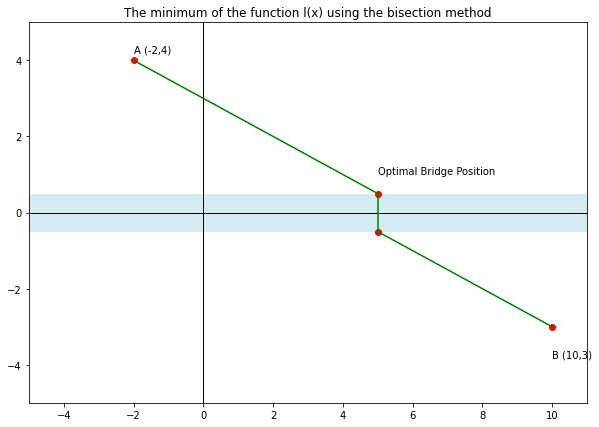

In [8]:
import numpy as np
import matplotlib.pyplot as plt


# question 2
def l(x):
    return np.sqrt((x + 2)**2 + 49 / 4) + np.sqrt((x - 10)**2 + 25 / 4) + 1


# we apply the bisection search method to find the minimum
# we set the tolerance to 0.0001
# we set the maximum number of iterations to 1000
# we set the interval to [-2, 10]
a = -2.0  # initial lower bound
b = 10  # initial upper bound
maxN = 10000  # max number of function evaluations
nfeval = 0  # counter for function evaulations
variant = 1  # change the function
Tol = 1e-4  # desired tolerance
va = l(a)  # initial values for the function
vb = l(b)


def Bisection(fun, A, B, tol=1e-6, ubFeval=10):
    nfeval = 0
    lbhist = []
    ubhist = []
    xmidhist = []
    lb = A
    ub = B
    lbhist.append(lb)
    ubhist.append(ub)
    while ub - lb > tol:
        xmid = (lb + ub) / 2
        # the compute the derivative
        df = (fun(xmid + tol) - fun(xmid)) / tol
        if df >= 0:
            ub = xmid
        else:
            lb = xmid
        lbhist.append(lb)
        ubhist.append(ub)
        xmidhist.append(xmid)
        nfeval += 1
        if nfeval > ubFeval:
            break
    return lbhist, ubhist, xmidhist, nfeval


lbhist, ubhist, xmidhist, nfeval = Bisection(l, a, b, tol=Tol, ubFeval=maxN)
# print the results
print('The minimum is at x = ', xmidhist[-1])
print('The minimum is at l(x) = ', l(xmidhist[-1]))
print('Our theorectical minimum is at x = ', 6 * np.sqrt(5) + 1)

fig, ax = plt.subplots(figsize=(10, 7))
plt.title('The minimum of the function l(x) using the bisection method')
ax.set_xlim([-5, 11])
ax.set_ylim([-5, 5])

ax.axhline(y=0, color='black', linewidth=1)
ax.axvline(x=0, color='black', linewidth=1)
ax.axhspan(-0.5, 0.5, facecolor='lightblue', alpha=0.5)
ax.plot([-2, 10], [4, -3], 'o', color='red')
ax.plot([5, 5], [0.5, -0.5], 'o', color='red')
ax.text(-2, 4.2, "A (-2,4)", fontsize=10)
ax.text(10, -3.8, "B (10,3)", fontsize=10)
ax.text(5, 1, "Optimal Bridge Position", fontsize=10)

# plot the line
ax.plot([-2, 5], [4, 0.5], '-', color='green')
ax.plot([5, 5], [0.5, -0.5],
        '-',
        color='green')
ax.plot([5, 10], [-0.5, -3], '-', color='green')
plt.show()


<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Question 3</td>
</tr>
</table>

---
We have the center follow the path $(x, \gamma(x))$, where $\gamma(x)=0.3\sin(0.25(x+1))$. Then we have the upperbound function that $\gamma_{upper}(x)=0.3\sin(0.25(x+1))+0.5$ and the lowerbound function that $\gamma_{lower}(x)=0.3\sin(0.25(x+1))-0.5$. Then we assume the contact point for upperbound part is $(x, \gamma_{upper}(x))$. Then we try to compute the point in the lowerbound part.

We need to compute the slope of the contact point by derivative, we got $\gamma(x)' = 0.075\cos(0.25(x+1))$. Then we got the contact point for lowerbound that $(x, \gamma_{lower}(x))=(x, \gamma_{upper}(x))+\frac{1}{\sqrt{1+\left(\gamma^{\prime}(x)\right)^2}}\left(\gamma^{\prime}(x), -1\right)$. Therefore, we can build the system as following code:

---

In [14]:
# question 3
def gamma_upper(x):
     return 0.3 * np.sin(0.25 * (x+1)) + 0.5
   
def gamma_derivative(x):
    return 0.075 * np.cos(0.25 * (x+1))
  
def gamma_norm(x):
    return 1 / np.sqrt(1 + gamma_derivative(x)**2)
  
def l_distance_upper(x):
    return np.sqrt((x + 2)**2 + (4 - gamma_upper(x)) ** 2)
  
def l_distance_lower(x):
    x_lower = x + gamma_norm(x) * gamma_derivative(x)
    y_lower = gamma_upper(x) - gamma_norm(x)
    return np.sqrt((x_lower - 10)**2 + (3 - y_lower) ** 2)

def l_distance(x):
    return l_distance_upper(x) + l_distance_lower(x) + 1

a = -2.0  # initial lower bound
b = 10  # initial upper bound
maxN = 10000  # max number of function evaluations
nfeval = 0  # counter for function evaulations
variant = 1  # change the function
Tol = 1e-4  # desired tolerance
va = l(a)  # initial values for the function
vb = l(b)


def Bisection(fun, A, B, tol=1e-6, ubFeval=10):
    nfeval = 0
    lbhist = []
    ubhist = []
    xmidhist = []
    lb = A
    ub = B
    lbhist.append(lb)
    ubhist.append(ub)
    while ub - lb > tol:
        xmid = (lb + ub) / 2
        # the compute the derivative
        df = (fun(xmid + tol) - fun(xmid)) / tol
        if df >= 0:
            ub = xmid
        else:
            lb = xmid
        lbhist.append(lb)
        ubhist.append(ub)
        xmidhist.append(xmid)
        nfeval += 1
        if nfeval > ubFeval:
            break
    return lbhist, ubhist, xmidhist, nfeval


lbhist, ubhist, xmidhist, nfeval = Bisection(l_distance, a, b, tol=Tol, ubFeval=maxN)
# print the results
print('The optimal coordinate choice for upperbound is at ', (xmidhist[-1], gamma_upper(xmidhist[-1])))
print('The minimum is at l(x) = ', l(xmidhist[-1]))
print('The optimal coordinate choice for lowerbound is at ', (xmidhist[-1] + gamma_norm(xmidhist[-1]) * gamma_derivative(xmidhist[-1]), gamma_upper(xmidhist[-1]) - gamma_norm(xmidhist[-1])))

The optimal coordinate choice for upperbound is at  (4.069488525390625, 0.7862956914342487)
The minimum is at l(x) =  14.442244443686088
The optimal coordinate choice for lowerbound is at  (4.091892130344276, -0.2134533163097353)


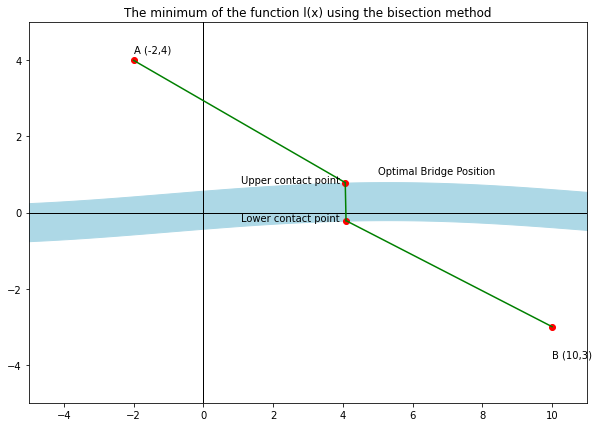

In [33]:
# plot the graph
fig, ax = plt.subplots(figsize=(10, 7))
plt.title('The minimum of the function l(x) using the bisection method')
ax.set_xlim([-5, 11])
ax.set_ylim([-5, 5])

ax.axhline(y=0, color='black', linewidth=1)
ax.axvline(x=0, color='black', linewidth=1)

x = np.arange(-5, 12, 0.1)
y_upper = 0.3 * np.sin(0.25 * (x+1)) + 0.5
y_lower = 0.3 * np.sin(0.25 * (x+1)) - 0.5

# Plot the shaded region between the upper and lower bounds
plt.fill_between(x, y_upper, y_lower, color='lightblue')

ax.plot([-2, 10], [4, -3], 'o', color='red')
ax.plot([4.069488525390625, 4.091892130344276], [0.7862956914342487, -0.2134533163097353], 'o', color='red')
ax.text(-2, 4.2, "A (-2,4)", fontsize=10)
ax.text(10, -3.8, "B (10,3)", fontsize=10)
ax.text(1.069488525390625, 0.7862956914342487, "Upper contact point", fontsize=10)
ax.text(1.091892130344276, -0.2134533163097353, "Lower contact point", fontsize=10)
ax.text(5, 1, "Optimal Bridge Position", fontsize=10)

# plot the line
ax.plot([-2, 4.069488525390625], [4, 0.7862956914342487], '-', color='green')
ax.plot([4.069488525390625,  4.091892130344276], [0.7862956914342487, -0.2134533163097353],
        '-',
        color='green')
ax.plot([4.091892130344276, 10], [-0.2134533163097353, -3], '-', color='green')
plt.show()


<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Answer</td>
</tr>
</table>

---
From the above code, we can see that the minimal distance is $14.442244443686088$. And the coordinate of the bridge is $(4.069488525390625, 0.7862956914342487)$ and $(4.091892130344276, -0.2134533163097353)$

---